<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/main/Stationaritate_Bitcoin_2016_2025_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalare și încărcare biblioteci necesare
install.packages(c("tidyverse", "tseries", "urca", "forecast", "quantmod"), dependencies = TRUE)

# Curățare mediu de lucru și închidere grafice
rm(list = ls())
graphics.off()

# Încărcare biblioteci necesare
library(tidyverse)
library(tseries)
library(urca)
library(forecast)
library(quantmod)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘x13binary’, ‘plogr’, ‘covr’, ‘feather’, ‘mockr’, ‘quadprog’, ‘zoo’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’, ‘xts’, ‘TTR’, ‘RMySQL’, ‘RSQLite’, ‘timeSeries’, ‘downloader’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading req

In [ ]:
# Descărcăm datele Bitcoin de la 1 ianuarie 2016 până la inceputul lui 2025
btc_xts <- getSymbols("BTC-USD", src = "yahoo", from = "2016-01-01", to = "2025-01-01", auto.assign = FALSE)

# Extragem doar prețul de închidere
btc_close_xts <- Cl(btc_xts)

# Convertim seria xts într-un data frame
btc_df <- data.frame(
  Date = index(btc_close_xts),
  Closing_Price = as.numeric(btc_close_xts)
)


#Pun datele din data frame intr-un csv
write.csv(btc_df, "Bitcoin_USD_Pret_Inchidere.csv", row.names = FALSE)

#Verificare fisier CSV
head(btc_df)

,Date,Closing_Price
,<date>,<dbl>
1,2016-01-01,434.334
2,2016-01-02,433.438
3,2016-01-03,430.011
4,2016-01-04,433.091
5,2016-01-05,431.960
6,2016-01-06,429.105


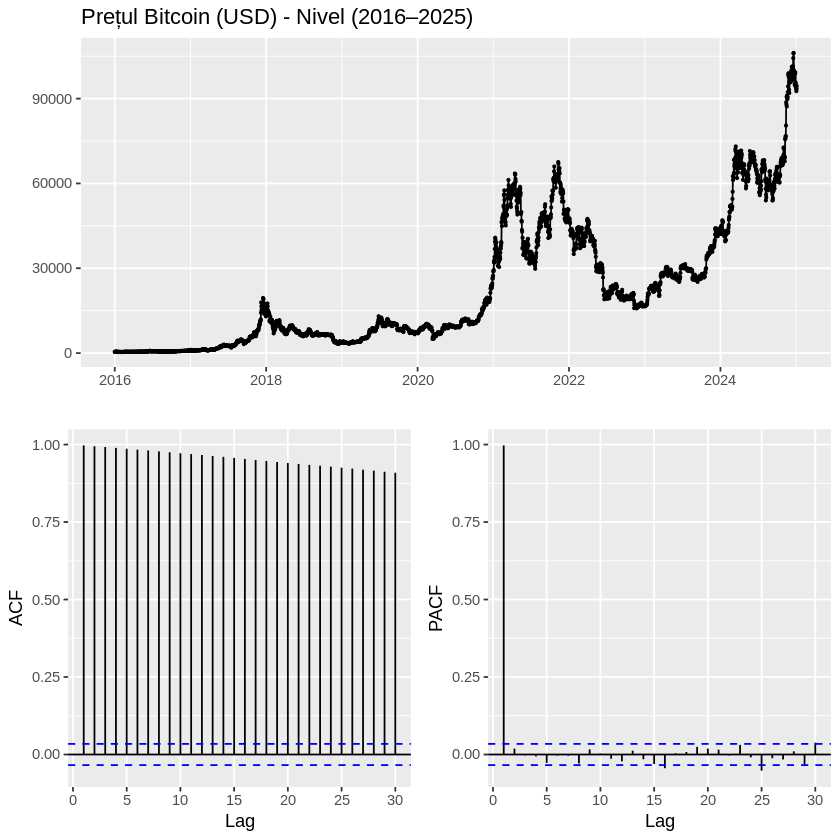

In [ ]:
# Convertim în serie temporală (frecvență zilnică)
btc_ts <- ts(btc_df$Closing_Price, start = c(2016, 1), frequency = 365)

#Grafic linie + ACF/PACF pentru nivel
ggtsdisplay(btc_ts, lag.max = 30, main = "Prețul Bitcoin (USD) - Nivel (2016–2025)")

Seria prețului Bitcoin în nivel arată o tendință clar ascendentă, cu episoade de volatilitate crescută (de exemplu, în 2017, 2021 și 2024). Acest comportament evidențiază o creștere exponențială și neregulară, tipică pentru piața Crypto și activele volatile.

In [ ]:
# ADF - none
summary(ur.df(btc_ts, type = "none", lags = 14, selectlags = "AIC"))
# Exemplu interpretare: Dacă stat. ADF este mai mică în modul decât valorile critice, nu respingem H0 => seria NU este staționară.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7457.4  -173.8     2.2   182.2  8085.0 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.0007401  0.0005672   1.305  0.19207    
z.diff.lag1  -0.0316665  0.0175289  -1.807  0.07093 .  
z.diff.lag2   0.0205182  0.0175142   1.172  0.24148    
z.diff.lag3  -0.0001213  0.0175201  -0.007  0.99448    
z.diff.lag4   0.0287249  0.0175216   1.639  0.10123    
z.diff.lag5   0.0221809  0.0174871   1.268  0.20474    
z.diff.lag6  -0.0298365  0.0174873  -1.706  0.08807 .  
z.diff.lag7  -0.0060826  0.0175307  -0.347  0.72864    
z.diff.lag8  -0.0350866  0.0175240  -2.002  0.04535 *  
z.diff.lag9   0.0716883  0.0175720   4.080 4.62e-05 ***
z.diff.lag10  0.0339675  0.0176135   1.928  0.05



# **1. Formularea ipotezelor**

- H₀ (ipoteza nulă): seria are rădăcină unitară → nu este staționară
- H₁ (ipoteza alternativă): seria este staționară

# **2. Valori statistice obținute**

- Statistica ADF: 1.3048
Valori critice:
- 1%: −2.58
- 5%: −1.95
- 10%: −1.62

# **3. Comparație și concluzie**

Statistica testului este mai mare decât toate valorile critice. Prin urmare, nu există suficiente dovezi pentru a respinge ipoteza nulă.

# **4. Interpretare economică**

Seria prețului de închidere al Bitcoinului în perioada 2016–2025 nu este staționară în nivel. Valorile prezintă o tendință persistentă și sunt influențate de șocuri trecute, ceea ce este tipic pentru serii financiare.

In [ ]:
# ADF - drift (constanta)
summary(ur.df(btc_ts, type = "drift", lags = 14, selectlags = "AIC"))
# Interpretare: verificăm semnificația coef. phi1 și valoarea ADF pentru concluzie


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7452.2  -185.6   -17.4   169.4  8099.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.8585708 24.9365829   0.836  0.40295    
z.lag.1       0.0002657  0.0008021   0.331  0.74044    
z.diff.lag1  -0.0314032  0.0175325  -1.791  0.07336 .  
z.diff.lag2   0.0207494  0.0175172   1.185  0.23629    
z.diff.lag3   0.0001235  0.0175234   0.007  0.99438    
z.diff.lag4   0.0289954  0.0175254   1.654  0.09813 .  
z.diff.lag5   0.0224758  0.0174914   1.285  0.19890    
z.diff.lag6  -0.0295354  0.0174918  -1.689  0.09141 .  
z.diff.lag7  -0.0057631  0.0175357  -0.329  0.74244    
z.diff.lag8  -0.0347828  0.0175286  -1.984  0.04730 *  
z.diff.lag9   0.0719616  0.0175759   4.094 4.34



# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica ADF (tau2): 0.3313

Valori critice ADF:
- 1%: −3.43
- 5%: −2.86
- 10%: −2.57
- Statistica phi1 (pentru drift): 1.201

Valori critice phi1:
- 1%: 6.43
- 5%: 4.59
- 10%: 3.78

# **3. Comparație și concluzie**
Valoarea statisticii ADF este mai mare decât toate valorile critice, deci nu respingem H₀. De asemenea, coeficientul constantei (phi1) nu este semnificativ statistic (p > 0.05).

# **4. Interpretare economică**
Seria prețului Bitcoin (2016–2025) nu este staționară nici când presupunem existența unui drift. Lipsa semnificației constantei sugerează că nici un nivel fix nu caracterizează evoluția. Prețul variază haotic și persistent în timp.

In [ ]:
# ADF - trend (trend determinist)
summary(ur.df(btc_ts, type = "trend", lags = 14, selectlags = "AIC"))
# Interpretare: verificăm tau3 (ADF), phi2 (constanta), phi3 (trendul)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7400.6  -207.4    13.5   172.3  8115.4 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -33.012197  37.354371  -0.884  0.37689    
z.lag.1       -0.001871   0.001364  -1.372  0.17026    
tt             0.061406   0.031713   1.936  0.05292 .  
z.diff.lag1   -0.030394   0.017533  -1.734  0.08310 .  
z.diff.lag2    0.021640   0.017516   1.235  0.21675    
z.diff.lag3    0.001062   0.017523   0.061  0.95168    
z.diff.lag4    0.030008   0.017526   1.712  0.08695 .  
z.diff.lag5    0.023596   0.017494   1.349  0.17748    
z.diff.lag6   -0.028403   0.017494  -1.624  0.10457    
z.diff.lag7   -0.004612   0.017538  -0.263  0.79260    
z.diff.lag8   -0.033685   0.017530  -1.921



# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica ADF (tau3): -1.3717

Valori critice ADF:
- 1%: −3.96
- 5%: −3.41
- 10%: −3.12

- Statistica phi2 (constanta): 2.0511  
- Statistica phi3 (trendul): 1.9295

Valori critice phi2:
- 1%: 6.29
- 5%: 4.68
- 10%: 4.03

Valori critice phi3:
- 1%: 8.27
- 5%: 6.25
- 10%: 5.34

# **3. Comparație și concluzie**
Statistica ADF este mai mare decât toate valorile critice în modul, deci nu respingem H₀. Nici constanta și nici trendul nu sunt semnificative statistic, conform valorilor phi2 și phi3.

# **4. Interpretare economică**
Seria prețului Bitcoin (2016–2025) nu este staționară nici când presupunem existența unui trend determinist. Evoluția seriei pare a fi dominată de factori neobservați și instabilitate structurală.


In [ ]:
# PP - constant
summary(ur.pp(btc_ts, type = "Z-tau", model = "constant"))
# Dacă stat. este mai mică în modul decât criticele => NU respingem H0 => seria NU e staționară


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7597.0  -185.9   -16.9   171.3  8174.4 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 19.218085  24.864066    0.773     0.44    
y.l1         1.000419   0.000787 1271.156   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1008 on 3286 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 1.616e+06 on 1 and 3286 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: 0.5381 

         aux. Z statistics
Z-tau-mu             0.771

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.435327 -2.862933 -2.567538


# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica PP (Z-tau-mu): 0.771

Valori critice:
- 1%: −3.4353
- 5%: −2.8629
- 10%: −2.5676

# **3. Comparație și concluzie**
Statistica testului este mai mare decât toate valorile critice. Prin urmare, nu respingem ipoteza nulă H₀ conform căreia seria nu este staționară.

# **4. Interpretare economică**
Seria prețului Bitcoin (2016–2025) rămâne nestaționară și în cadrul testului PP. Aceasta confirmă instabilitatea mediei și dependența de șocuri anterioare în evoluția pieței crypto.

In [ ]:
# PP - trend
summary(ur.pp(btc_ts, type = "Z-tau", model = "trend"))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-7547.3  -205.2    12.8   164.4  8197.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 63.225571  34.653079   1.825   0.0682 .  
y.l1         0.998449   0.001337 746.747   <2e-16 ***
trend        0.057328   0.031455   1.823   0.0685 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1007 on 3285 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 8.085e+05 on 2 and 3285 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -1.1683 

           aux. Z statistics
Z-tau-mu              1.8104
Z-tau-beta            1.8269

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical values -3.9


# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica Z-tau: −1.1683

Valori critice:
- 1%: −3.966345
- 5%: −3.41383
- 10%: −3.128636

# **3. Comparație și concluzie**
Valoarea statisticii Z-tau este mai mare decât toate valorile critice. Nu putem respinge ipoteza nulă H₀, deci considerăm că seria nu este staționară nici în prezența unui trend determinist.

# **4. Interpretare economică**
Seria Bitcoin (2016–2025) își păstrează comportamentul de serie nestaționară, chiar și atunci când presupunem existența unui trend. Evoluția sa este dominată de șocuri externe și nu are o tendință stabilă sau predictibilă.

In [ ]:
# KPSS - mu (constanta)
summary(ur.kpss(btc_ts, type = "mu"))
# Dacă stat. > valori critice => respingem H0 => seria NU e staționară


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 21.7143 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



# **1. Formularea ipotezelor**
- H₀: seria este staționară
- H₁: seria nu este staționară

# **2. Valori statistice obținute**

Statistica KPSS: 21.7143

Valori critice:
- 10%: 0.347
- 5%: 0.463
- 2.5%: 0.574
- 1%: 0.739

# **3. Comparație și concluzie**
Valoarea statisticii testului este mult mai mare decât toate valorile critice. Prin urmare, respingem ipoteza nulă conform căreia seria este staționară.

# **4. Interpretare economică**
Rezultatul confirmă faptul că seria prețului Bitcoin (2016–2025) nu este staționară. Aceasta nu fluctuează în jurul unei medii constante și prezintă o volatilitate excesivă.

In [ ]:
# KPSS - tau (trend)
summary(ur.kpss(btc_ts, type = "tau"))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 9 lags. 

Value of test-statistic is: 1.4168 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



# **1. Formularea ipotezelor**
- H₀: seria este staționară în jurul unui trend determinist
- H₁: seria nu este staționară

# **2. Valori statistice obținute**

Statistica KPSS: 1.4168

Valori critice:
- 10%: 0.119
- 5%: 0.146
- 2.5%: 0.176
- 1%: 0.216

# **3. Comparație și concluzie**
Statistica testului este mult mai mare decât toate valorile critice. Respinge ipoteza nulă, deci concluzionăm că seria nu este staționară nici în jurul unui trend determinist.

# **4. Interpretare economică**
Prețul Bitcoin (2016–2025) nu urmează un trend liniar stabil și prezintă instabilitate pe termen lung. Seria este afectată de șocuri persistente și volatilitate ridicată.

In [ ]:
# === 4. Diferențierea seriei pentru staționarizare ===
btc_diff <- diff(btc_ts)

Facem diferențierea seriei pentru a o transforma într-o formă staționară, necesară pentru aplicarea corectă a modelelor ARIMA. Seria originală a prețului Bitcoin nu are medie și varianță constante în timp, ceea ce încalcă ipotezele de bază ale acestor modele. Prin aplicarea funcției diff(), eliminăm trendul și obținem o serie stabilă, ce reflectă variațiile zilnice (randamentele). Această transformare corespunde diferențierii de ordinul 1, adică D = 1 în modelul ARIMA(P,D,Q).

In [ ]:
# === 5. Teste pe seria diferențiată ===

# ADF - none
summary(ur.df(btc_diff, type = "none", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7418.8  -161.6     4.3   195.7  8130.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      -0.917645   0.061570 -14.904  < 2e-16 ***
z.diff.lag1  -0.112733   0.059277  -1.902  0.05728 .  
z.diff.lag2  -0.091010   0.057172  -1.592  0.11151    
z.diff.lag3  -0.089907   0.054924  -1.637  0.10174    
z.diff.lag4  -0.059868   0.052374  -1.143  0.25308    
z.diff.lag5  -0.036304   0.049234  -0.737  0.46095    
z.diff.lag6  -0.064781   0.046102  -1.405  0.16006    
z.diff.lag7  -0.069420   0.042799  -1.622  0.10490    
z.diff.lag8  -0.103115   0.039419  -2.616  0.00894 ** 
z.diff.lag9  -0.030076   0.035541  -0.846  0.39748    
z.diff.lag10  0.005251   0.030877   0.170  0.86497    
z.di



# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica ADF: −14.9041

Valori critice:
- 1%: −2.58
- 5%: −1.95
- 10%: −1.62

# **3. Comparație și concluzie**
Statistica testului este mult mai mică decât toate valorile critice. Astfel, respingem ipoteza nulă și concluzionăm că seria diferențiată este staționară.

# **4. Interpretare economică**
După diferențiere, prețul Bitcoin devine o serie staționară, cu variații stabile în jurul unei medii. Aceasta indică faptul că randamentele (nu nivelurile) sunt predictibile într-un cadru statistic.

In [ ]:
# ADF - drift
summary(ur.df(btc_diff, type = "drift", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7443.8  -188.2   -22.6   171.4  8111.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.701675  17.638236   1.514   0.1302    
z.lag.1      -0.927218   0.061882 -14.984   <2e-16 ***
z.diff.lag1  -0.103880   0.059553  -1.744   0.0812 .  
z.diff.lag2  -0.082850   0.057414  -1.443   0.1491    
z.diff.lag3  -0.082438   0.055134  -1.495   0.1350    
z.diff.lag4  -0.053131   0.052552  -1.011   0.3121    
z.diff.lag5  -0.030324   0.049383  -0.614   0.5392    
z.diff.lag6  -0.059531   0.046223  -1.288   0.1979    
z.diff.lag7  -0.064946   0.042893  -1.514   0.1301    
z.diff.lag8  -0.099393   0.039488  -2.517   0.0119 *  
z.diff.lag9  -0.027113   0.035588  -0.762   0.4462    
z.d


# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica ADF (tau2): −14.9837  
Valori critice ADF:
- 1%: −3.43
- 5%: −2.86
- 10%: −2.57

Statistica phi1 (constanta): 112.2554  
Valori critice phi1:
- 1%: 6.43
- 5%: 4.59
- 10%: 3.78

# **3. Comparație și concluzie**
Statistica ADF este mult mai mică decât valorile critice, deci respingem H₀. Constanta este semnificativă statistic, conform valorii phi1 foarte mari, confirmând prezența unui nivel stabil.

# **4. Interpretare economică**
După diferențiere, seria prețului Bitcoin devine staționară și prezintă o medie constantă. Acest comportament este tipic pentru randamente, nu pentru nivelurile de preț.

In [ ]:
# ADF - trend
summary(ur.df(btc_diff, type = "trend", lags = 14, selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7450.5  -194.4     8.9   173.8  8076.5 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -16.364916  35.339027  -0.463   0.6433    
z.lag.1       -0.935650   0.062162 -15.052   <2e-16 ***
tt             0.026234   0.018655   1.406   0.1597    
z.diff.lag1   -0.096063   0.059803  -1.606   0.1083    
z.diff.lag2   -0.075618   0.057636  -1.312   0.1896    
z.diff.lag3   -0.075795   0.055328  -1.370   0.1708    
z.diff.lag4   -0.047126   0.052718  -0.894   0.3714    
z.diff.lag5   -0.024977   0.049522  -0.504   0.6140    
z.diff.lag6   -0.054828   0.046337  -1.183   0.2368    
z.diff.lag7   -0.060948   0.042981  -1.418   0.1563    
z.diff.lag8   -0.096077   0.039552  -2.429


# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

Statistica ADF (tau3): −15.0517  
Valori critice:
- 1%: −3.96  
- 5%: −3.41  
- 10%: −3.12

Statistici suplimentare:
- phi2 (pentru constantă): 75.5186  
- phi3 (pentru trend): 113.2778  
Valori critice:
- phi2: 6.09 (1%), 4.68 (5%), 4.03 (10%)  
- phi3: 8.27 (1%), 6.25 (5%), 5.34 (10%)

# **3. Comparație și concluzie**
Toate valorile testului sunt mai extreme decât valorile critice. Prin urmare, respingem ipoteza nulă și concluzionăm că seria diferențiată este staționară.

# **4. Interpretare economică**
Seria diferențiată a prețului Bitcoin (2016–2025) este staționară în jurul unui trend liniar. Aceasta indică o variație relativ stabilă a randamentelor în timp, tipică pentru active financiare.

In [ ]:
# PP
summary(ur.pp(btc_diff, type = "Z-tau", model = "constant"))
summary(ur.pp(btc_diff, type = "Z-tau", model = "trend"))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7554.7  -188.3   -26.2   167.8  8324.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 29.56221   17.57641   1.682   0.0927 .
y.l1        -0.03425    0.01744  -1.964   0.0497 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1007 on 3285 degrees of freedom
Multiple R-squared:  0.001172,	Adjusted R-squared:  0.0008684 
F-statistic: 3.856 on 1 and 3285 DF,  p-value: 0.04965


Value of test-statistic, type: Z-tau  is: -59.2705 

         aux. Z statistics
Z-tau-mu             1.681

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.435328 -2.862934 -2.567538



################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-7563.1  -197.9     9.3   170.5  8281.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 29.56755   17.57262   1.683   0.0925 .
y.l1        -0.03494    0.01744  -2.003   0.0452 *
trend        0.02878    0.01852   1.554   0.1202  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1007 on 3284 degrees of freedom
Multiple R-squared:  0.001907,	Adjusted R-squared:  0.001299 
F-statistic: 3.137 on 2 and 3284 DF,  p-value: 0.04355


Value of test-statistic, type: Z-tau  is: -59.3031 

           aux. Z statistics
Z-tau-mu              1.5869
Z-tau-beta            1.5535

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical values -3.966346 -3.41


# **1. Formularea ipotezelor**
- H₀: seria are rădăcină unitară → nu este staționară
- H₁: seria este staționară

# **2. Valori statistice obținute**

*Pentru modelul cu constantă:*
- Statistica Z-tau: −59.2705  
- Valori critice:  
  - 1%: −3.4353  
  - 5%: −2.8629  
  - 10%: −2.5676

*Pentru modelul cu constantă și trend:*
- Statistica Z-tau: −59.3031  
- Valori critice:  
  - 1%: −3.9663  
  - 5%: −3.4138  
  - 10%: −3.1286

# **3. Comparație și concluzie**
În ambele cazuri, valorile testului sunt mult mai mici decât valorile critice. Astfel, respingem ipoteza nulă H₀ → seria diferențiată este clar staționară, indiferent de specificație.

# **4. Interpretare economică**
După diferențiere, prețul Bitcoin devine o serie stabilă și predictibilă statistic. Acest comportament este tipic pentru randamente, care nu prezintă trend sau medie instabilă în timp.

In [ ]:
# KPSS
summary(ur.kpss(btc_diff, type = "mu"))
summary(ur.kpss(btc_diff, type = "tau"))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 0.2644 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 9 lags. 

Value of test-statistic is: 0.0851 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



# **1. Formularea ipotezelor**
- H₀: seria este staționară
- H₁: seria nu este staționară

# **2. Valori statistice obținute**

 Pentru specificația mu (constanta):  
- Statistica KPSS: 0.2644  
- Valori critice:
  - 10%: 0.347
  - 5%: 0.463
  - 2.5%: 0.574
  - 1%: 0.739

Pentru specificația tau (trend):  
- Statistica KPSS: 0.0851  
- Valori critice:
  - 10%: 0.119
  - 5%: 0.146
  - 2.5%: 0.176
  - 1%: 0.216

# **3. Comparație și concluzie**

În ambele cazuri, valorile testului sunt mai mici decât toate valorile critice. Prin urmare, nu respingem ipoteza nulă și concluzionăm că seria diferențiată este staționară.

# **4. Interpretare economică**

Rezultatele arată că seria diferențiată a prețului Bitcoin este staționară atât în jurul unei medii constante, cât și în jurul unui trend determinist. Randamentele zilnice nu prezintă instabilitate sistematică pe termen lung.

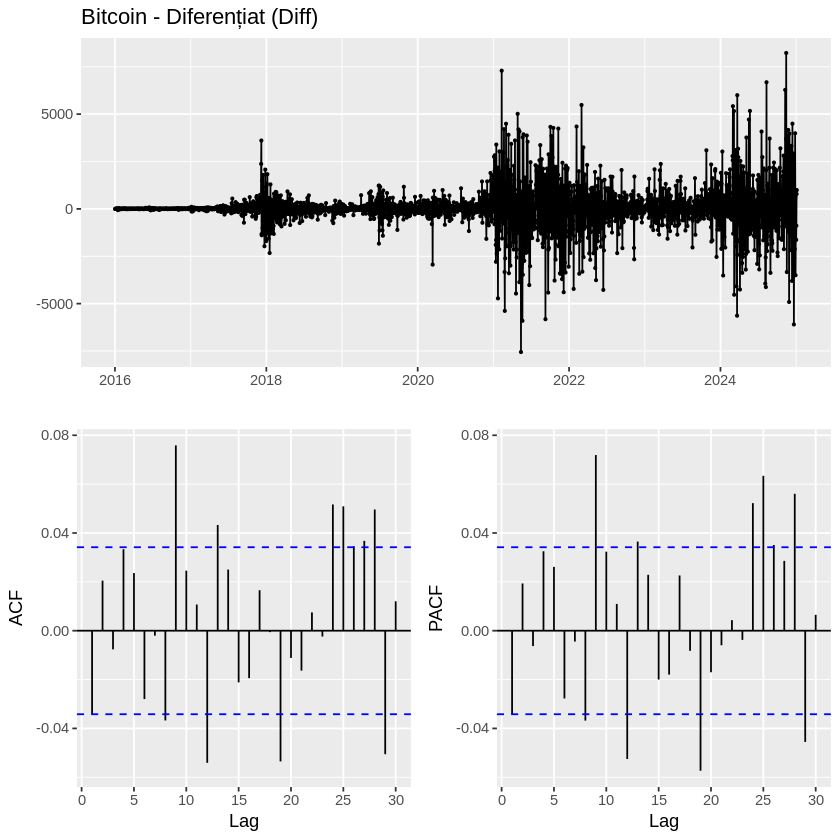

In [ ]:
# === 6. Corelogramă pentru seria diferențiată ===
ggtsdisplay(btc_diff, lag.max = 30, main = "Bitcoin - Diferențiat (Diff)")

**ACF**: Se observă autocorelații semnificative la lagurile 8, 9, 12, 19, 24–29.

**PACF**: Valoril semnificative la lagurile 7, 8, 13, 14, 19, 24–26, 28, 29.

In [ ]:
# === 7. Identificarea modelului ARIMA ===
model_arima <- auto.arima(btc_ts)
summary(model_arima)

Series: btc_ts 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.0329  28.5834
s.e.   0.0171  16.9809

sigma^2 = 1014390:  log likelihood = -27400.66
AIC=54807.31   AICc=54807.32   BIC=54825.61

Training set error measures:
                       ME    RMSE      MAE        MPE     MAPE       MASE
Training set -0.009084953 1006.71 526.0021 -0.8451953 2.862234 0.03394872
                      ACF1
Training set -0.0006730069

Modelul estimat este ARIMA(0,1,1) cu drift, adică o serie diferențiată o dată (D = 1), fără componentă AR (P = 0), dar cu o componentă MA(1) (Q = 1) și un drift semnificativ.

# **Interpretare:**

MA(1) = –0.0329: indică o dependență slabă de eroarea anterioară.

Drift = 28.5834: semnalează o tendință ascendentă medie a seriei (creștere lentă în timp).

AIC = 54807.31 / BIC = 54825.61: valori relativ mici → modelul este eficient și bine calibrat.

Reziduurile au autocorelare foarte mică (ACF1 = –0.00067), deci nu există pattern-uri nereziduale → validare bună a modelului.